In [ ]:
!curl -L "https://app.roboflow.com/ds/IdRp6ZfiZM?key=2YzUTp5EY8" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3136      0 --:--:-- --:--:-- --:--:--  3128
100  296k  100  296k    0     0   452k      0 --:--:-- --:--:-- --:--:--  452k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.coco.json  
 extracting: test/resized_image_3_jpg.rf.635f8af28aa0f9bb3e87f256028c06d8.jpg  
   creating: train/
 extracting: train/_annotations.coco.json  
 extracting: train/resized_image_1_jpg.rf.12ef56c91b705f108ff649b849101311.jpg  
 extracting: train/resized_image_1_jpg.rf.2f4f53449e2c2072eab3cb455c3cf6f3.jpg  
 extracting: train/resized_image_1_jpg.rf.c840d92c7c83e0d0f332d67cd79f08d0.jpg  
 extracting: train/resized_image_2_jpg.rf.0ba80d205d92173247975c2edbbfb938.jpg  
 extracting: train/resized_image_2_jpg.rf.a85150a5f6876

In [ ]:
!python -m pip install -q 'git+https://github.com/facebookresearch/detectron2.git'

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

['/content/train/resized_image_1_jpg.rf.12ef56c91b705f108ff649b849101311.jpg', '/content/train/resized_image_1_jpg.rf.2f4f53449e2c2072eab3cb455c3cf6f3.jpg', '/content/train/resized_image_1_jpg.rf.c840d92c7c83e0d0f332d67cd79f08d0.jpg', '/content/train/resized_image_2_jpg.rf.0ba80d205d92173247975c2edbbfb938.jpg', '/content/train/resized_image_2_jpg.rf.a85150a5f68767e0ac3193d4eb05cae5.jpg', '/content/train/resized_image_2_jpg.rf.bf8f25db2c0936542490e4f643b07959.jpg', '/content/train/resized_image_4_jpg.rf.3a96ea2521b4637cbad9de55ace176ba.jpg', '/content/train/resized_image_4_jpg.rf.3e6cd87a8c8f9fab968315b768f763aa.jpg', '/content/train/resized_image_4_jpg.rf.bfa07f168dd39ce2b8f13411213a786e.jpg']


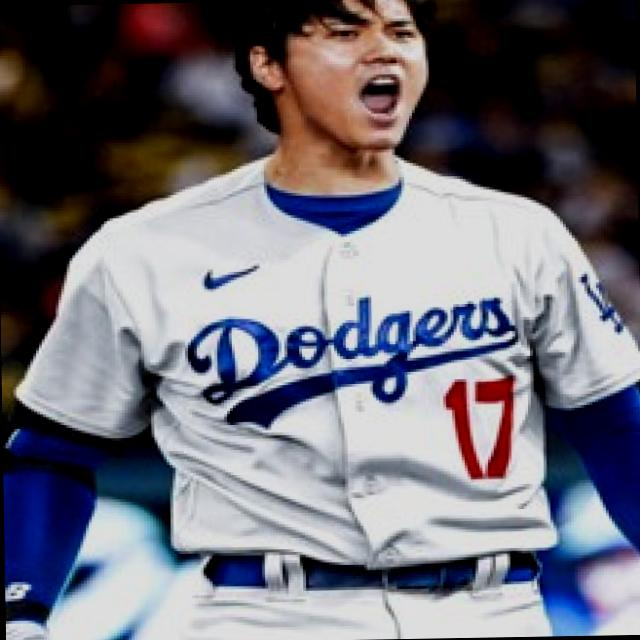

(640, 640, 3)

In [ ]:
import sys, os
from glob import glob
import cv2
from google.colab.patches import cv2_imshow
import torch, detectron2
image_path = sorted(glob('/content/train/*.jpg'))
print(image_path)
im = cv2.imread(image_path[0])
cv2_imshow(im)
im.shape

In [ ]:
video_path = "/content/[MLB 개막전] LA 다저스 vs SD 파드리스 _ MLB 월드투어 서울 시리즈 2024.mp4"
cap = cv2.VideoCapture(video_path)

images = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        images.append(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    else:
        break

In [ ]:
import cv2

cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('baseball.mp4', fourcc, 30, (640, 640))


register_coco_instances( "car_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("car_test", {}, "/content/test/_annotations.coco.json", "/content/test")
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_train",)
cfg.DATASETS.TEST = ("car_test",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.INPUT.MAX_SIZE_TEST = 640
cfg.INPUT.MAX_SIZE_TRAIN = 640
cfg.INPUT.MIN_SIZE_TEST = 640
cfg.INPUT.MIN_SIZE_TRAIN = 640
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 300
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
predictor = DefaultPredictor(cfg)

for image in images:

    pred_image = predictor(image)
    v = Visualizer(
        image,  # RGB 이미지를 직접 사용
        MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
        scale=1.0,
    )

    output = v.draw_instance_predictions(pred_image["instances"].to("cpu"))
    img = output.get_image()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    out.write(img_rgb)

cap.release()
out.release()
cv2.destroyAllWindows()

[03/21 07:59:01 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:02, 88.7MB/s]                          
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[03/21 07:59:03 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[03/21 07:59:30 d2.utils.events]:  eta: 0:04:27  iter: 19  total_loss: 2.136  loss_cls: 1.006  loss_box_reg: 0.3725  loss_mask: 0.677  loss_rpn_cls: 0.0642  loss_rpn_loc: 0.0246    time: 0.9845  last_time: 0.9372  data_time: 0.1033  last_data_time: 0.0600   lr: 1.6068e-05  max_mem: 4737M
[03/21 07:59:53 d2.utils.events]:  eta: 0:04:09  iter: 39  total_loss: 1.648  loss_cls: 0.6941  loss_box_reg: 0.3726  loss_mask: 0.5395  loss_rpn_cls: 0.00635  loss_rpn_loc: 0.01639    time: 0.9814  last_time: 0.9716  data_time: 0.0794  last_data_time: 0.0789   lr: 3.2718e-05  max_mem: 4737M
[03/21 08:00:13 d2.utils.events]:  eta: 0:03:54  iter: 59  total_loss: 1.179  loss_cls: 0.3972  loss_box_reg: 0.4218  loss_mask: 0.3633  loss_rpn_cls: 0.003844  loss_rpn_loc: 0.01573    time: 0.9918  last_time: 1.0098  data_time: 0.0838  last_data_time: 0.0623   lr: 4.9367e-05  max_mem: 4737M
[03/21 08:00:34 d2.utils.events]:  eta: 0:03:38  iter: 79  total_loss: 0.9525  loss_cls: 0.2545  loss_box_reg: 0.4271  loss_

AttributeError: shape